<a href="https://colab.research.google.com/github/SallaguntaRaahul/Detection-of-Fake-News-Using-ML/blob/master/Mini_Project(URK19CS1256).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0--->Fake News
1--->Real News

Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import string

Loading dataset

In [ ]:
fake=pd.read_csv('Fake.csv')
true=pd.read_csv('True.csv')

In [ ]:
true.shape

(21417, 4)

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true['target']=1
fake['target']=0

In [ ]:
true.head()


,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
df=pd.concat([true,fake])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
df.describe()

,target
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df.tail()

,title,text,subject,date,target
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
df.sample(10)

,title,text,subject,date,target
11962,DIAMOND AND SILK Give It To “Underhanded” Mery...,.@DiamondandSilk wasn t pleased by the underha...,politics,"Jan 9, 2017",0
19561,Fake letters tell Germans the web has worked o...,BERLIN (Reuters) - German prosecutors said on ...,worldnews,"September 20, 2017",1
2941,UNHINGED Trump Supporters Visit DC For Inaugu...,President-elect Donald Trump set the stage for...,News,"January 19, 2017",0
2461,House leader says willing to do conference com...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"July 27, 2017",1
19183,DINGBAT DEMOCRAT Maxine Waters Hopes Trump Won...,When will the Democrats realize they lost the ...,left-news,"Feb 6, 2017",0
12101,STUNNING GRAPHIC Of Obama’s Legacy That Every ...,The Democrats doubled down on moving to the le...,politics,"Dec 19, 2016",0
17960,Ethnic land dispute forces thousands to flee i...,"GUIGLO, Ivory Coast (Reuters) - An ethnic-fuel...",worldnews,"October 9, 2017",1
13727,WATCH CROOKED HILLARY Make Claim No Lives Lost...,"What about Chris Stevens, Sean Smith, Glen Doh...",politics,"Jun 9, 2016",0
12527,Tillerson set to meet Trudeau for North Korea ...,OTTAWA (Reuters) - U.S. Secretary of State Rex...,worldnews,"December 11, 2017",1
6465,Republican senators urge Trump to embrace find...,WASHINGTON (Reuters) - Two senior Republican s...,politicsNews,"January 8, 2017",1


In [ ]:
count=df['target'].value_counts()
print(count)

0    23481
1    21417
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


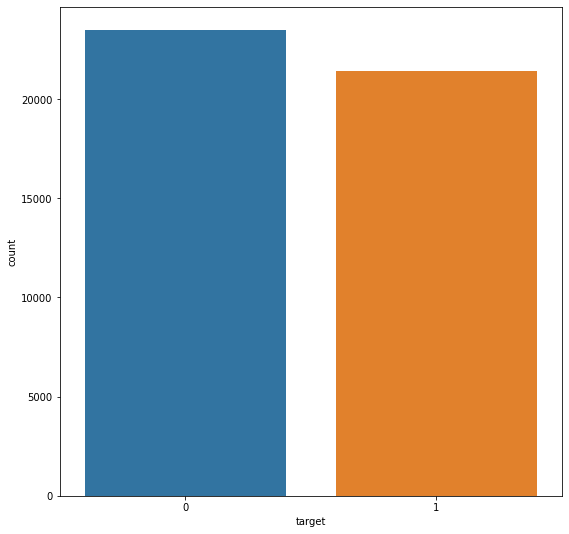

In [ ]:
plt.figure(figsize=(9,9))
sns.countplot(df.target)

In [ ]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

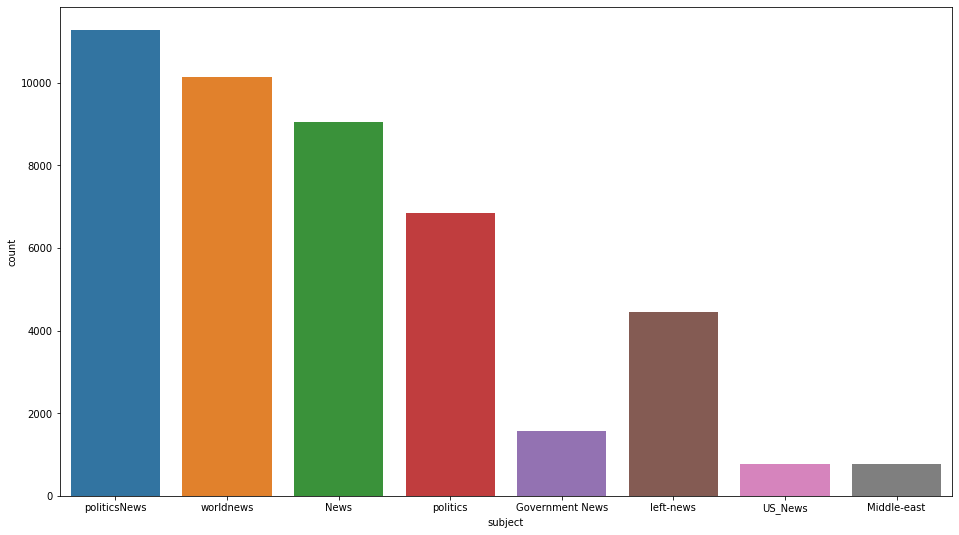

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(x="subject",data=df)


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop=True)

In [ ]:
df.head()

,title,text,subject,date,target
0,"Tillerson, Russia's Lavrov discuss Syria, Ukra...",NEW YORK (Reuters) - Russian Foreign Minister ...,politicsNews,"September 18, 2017",1
1,#FlashbackFriday: Watch Stunning Lies That Led...,"Every single day for months on end, new eviden...",politics,"Oct 21, 2016",0
2,Obama Pens STUNNING Response To Trump’s Cold-...,Trump is working his tail off to undo absolute...,News,"September 5, 2017",0
3,WATCH: Lewis Black Hilariously BURNS Trump An...,If Lewis Black really does have a ticket to th...,News,"January 19, 2017",0
4,Racist Moron Gets Fired For This 20 Second Vi...,It s not often that the stupidity of a racist ...,News,"January 9, 2016",0


In [ ]:
df.tail()

,title,text,subject,date,target
44893,WHY HILLARY LOVES The Idea Of Barack Obama As ...,Remember when this would seem like a far-fetch...,politics,"Jul 31, 2016",0
44894,Indonesia reopens Bali airport as wind clears ...,"DENPASAR, Indonesia (Reuters) - The airport on...",worldnews,"November 29, 2017",1
44895,British lawmakers defeat May's government on B...,LONDON (Reuters) - British lawmakers defeated ...,worldnews,"December 13, 2017",1
44896,WHILE OBAMA VACATIONS AND HANDS OUT A BILLION ...,Hey Barry tell us again about what a great dea...,left-news,"Jul 25, 2015",0
44897,#FreeChrisChristie: Twitter Reacts To The ‘Ho...,"Last Friday, New Jersey Governor Chris Christi...",News,"March 2, 2016",0


In [ ]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [ ]:
df=df.fillna("")

In [ ]:
df.drop(["date"],axis=1,inplace=True)
df.drop(["title"],axis=1,inplace=True)
Z=df.drop(["subject"],axis=1,inplace=True)

In [ ]:
df.head()

,text,target
0,NEW YORK (Reuters) - Russian Foreign Minister ...,1
1,"Every single day for months on end, new eviden...",0
2,Trump is working his tail off to undo absolute...,0
3,If Lewis Black really does have a ticket to th...,0
4,It s not often that the stupidity of a racist ...,0


In [ ]:
X=df.drop(columns='target',axis=1)

In [ ]:
Y=df['target']

In [ ]:
print(X)

                                                    text
0      NEW YORK (Reuters) - Russian Foreign Minister ...
1      Every single day for months on end, new eviden...
2      Trump is working his tail off to undo absolute...
3      If Lewis Black really does have a ticket to th...
4      It s not often that the stupidity of a racist ...
...                                                  ...
44893  Remember when this would seem like a far-fetch...
44894  DENPASAR, Indonesia (Reuters) - The airport on...
44895  LONDON (Reuters) - British lawmakers defeated ...
44896  Hey Barry tell us again about what a great dea...
44897  Last Friday, New Jersey Governor Chris Christi...

[44898 rows x 1 columns]


In [ ]:
print(Y)

0        1
1        0
2        0
3        0
4        0
        ..
44893    0
44894    1
44895    1
44896    0
44897    0
Name: target, Length: 44898, dtype: int64


In [ ]:
print(df['text'])

0        NEW YORK (Reuters) - Russian Foreign Minister ...
1        Every single day for months on end, new eviden...
2        Trump is working his tail off to undo absolute...
3        If Lewis Black really does have a ticket to th...
4        It s not often that the stupidity of a racist ...
                               ...                        
44893    Remember when this would seem like a far-fetch...
44894    DENPASAR, Indonesia (Reuters) - The airport on...
44895    LONDON (Reuters) - British lawmakers defeated ...
44896    Hey Barry tell us again about what a great dea...
44897    Last Friday, New Jersey Governor Chris Christi...
Name: text, Length: 44898, dtype: object


In [ ]:
def textoptimize(text):
  text=text.lower()
  text=re.sub('\[.*?\]', '', text)
  text=re.sub("\\W"," ", text)
  text=re.sub('https?://\S+|www\.\s+', '',text)
  text=re.sub('<.*?>+', '',text)
  text=re.sub('[%s]' %re.escape(string.punctuation), '',text)
  text=re.sub('\n', '',text)
  text=re.sub('\w*\d\w*', '',text)

  return text


In [ ]:
df["text"] = df["text"].apply(textoptimize)

In [ ]:
print(df["text"])

0        new york  reuters    russian foreign minister ...
1        every single day for months on end  new eviden...
2        trump is working his tail off to undo absolute...
3        if lewis black really does have a ticket to th...
4        it s not often that the stupidity of a racist ...
                               ...                        
44893    remember when this would seem like a far fetch...
44894    denpasar  indonesia  reuters    the airport on...
44895    london  reuters    british lawmakers defeated ...
44896    hey barry tell us again about what a great dea...
44897    last friday  new jersey governor chris christi...
Name: text, Length: 44898, dtype: object


In [ ]:
pip install wordcloud

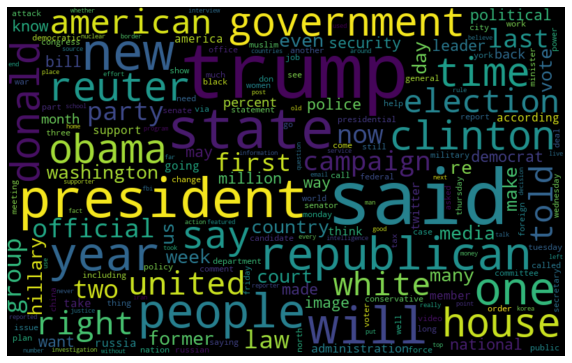

In [ ]:
from wordcloud import WordCloud

fake_data = df[df["target"] == "fake"]
all_words = ' '.join([text for text in df.text])

wordcloud = WordCloud(width= 800, height= 500,max_font_size = 110,collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

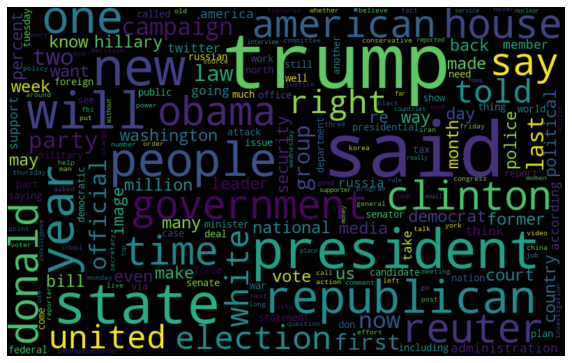

In [ ]:
from wordcloud import WordCloud

real_data = df[df["target"] == "true"]
all_words = ' '.join([text for text in df.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
X = df['text'].values
Y = df['target'].values

In [ ]:
print(X)

['new york  reuters    russian foreign minister sergei lavrov and u s  secretary of state rex tillerson discussed cooperation on the syrian crisis  middle east issues  and the agreement to bring peace to ukraine in a meeting on sunday  lavrov s spokeswoman said  spokeswoman maria zakharova said  the meeting was on cooperation in syria crisis  middle east issues and minsk agreement   no other details were immediately available  the top russian and u s  diplomats met in new york on the sidelines of the united nations general assembly  '
 'every single day for months on end  new evidence has been released that proves hillary clinton is a sociopathic liar  there may be some women who are willing to accept this fact and still vote for her  but what about her sexual predator husband who was impeached for lying about an affair he had with a young intern in our white house while serving as president of the united states the media went crazy when an audio tape was released of donald j  trump sp

In [ ]:
print(Y)

[1 0 0 ... 1 0 0]


In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 105122)	0.20439664765783547
  (0, 104768)	0.16360747586853772
  (0, 102181)	0.04896982103195042
  (0, 101506)	0.035426110231121445
  (0, 98281)	0.06136671465390025
  (0, 97327)	0.1347287542895418
  (0, 94825)	0.08094948942502771
  (0, 94479)	0.05572890721057524
  (0, 94102)	0.1286475710747586
  (0, 93206)	0.16350481975233672
  (0, 91427)	0.11686445831516906
  (0, 91413)	0.10236602681339263
  (0, 90494)	0.08932210411361366
  (0, 88763)	0.056658943745720704
  (0, 88101)	0.2213680165372229
  (0, 85346)	0.15478350209227532
  (0, 83737)	0.15193502158242816
  (0, 83149)	0.07924145648688508
  (0, 81146)	0.06948567619686369
  (0, 80716)	0.18192524686182254
  (0, 78817)	0.12915653531873558
  (0, 78637)	0.045729090505768295
  (0, 69395)	0.1084903594117988
  (0, 67320)	0.05432451165438271
  (0, 66540)	0.11526144174701243
  :	:
  (44897, 11876)	0.05004223063357118
  (44897, 10868)	0.0704169187191999
  (44897, 9416)	0.09510454195960026
  (44897, 9293)	0.023608428386607695
  (44897, 8567)	0.02

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
#Model-1
#Logistic Regression
model1 = LogisticRegression()

In [ ]:
model1.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy score on the training data
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9912300239434267


In [ ]:
# accuracy score on the test data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9870824053452116


In [ ]:
#Logistic Regression
X_new = X_test[1000]


prediction = model1.predict(X_new)
print(prediction)

if (prediction[0]=='true'):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
print(Y_test[1000])

1


Model-2
Decision tree classifier

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(X_test)

In [ ]:
DT.score(X_test, Y_test)

0.995879732739421

In [ ]:
#Decision Tree
X_new_1 = X_test[1000]

prediction = DT.predict(X_new_1)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Real


In [ ]:
#Model3
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(X_test)

In [ ]:
RFC.score(X_test, Y_test)

0.989086859688196

In [ ]:
#Random Forest
X_new_2 = X_test[1000]

prediction = RFC.predict(X_new_2)
print(prediction)

if (prediction[0]=='true'):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [ ]:
print(Y_test[90])

0
